In [1]:
# package imports...

In [307]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings('ignore')

In [48]:
# dataset CSV imports...

In [49]:
df_maths = pd.read_csv('student_mat.csv', delimiter = ';')
df_portuguese = pd.read_csv('student_por.csv', delimiter = ';')

In [50]:
# functions...

In [51]:
def SORT_DF(df, column, ascending_TF):

    """ organises a dataset in ascending or
    descending order of the input column """
    
    df = df.sort_values(by = f'{column}', ascending = bool(f'{ascending_TF}'))
    return df

def CATEGORICAL_DATAPOINTS(df,
                           C1 = 'school', 
                           C2 = 'sex', 
                           C3 = 'address', 
                           C4 = 'famsize', 
                           C5 = 'Pstatus', 
                           C6 = 'Mjob', 
                           C7 = 'Fjob', 
                           C8 = 'reason', 
                           C9 = 'guardian', 
                           C10 = 'schoolsup',
                           C11 = 'famsup',
                           C12 = 'paid',
                           C13 = 'activities',
                           C14 = 'nursery',
                           C15 = 'higher',
                           C16 = 'internet', 
                           C17 = 'romantic'):   

    dpoints = [C1, 
               C2, 
               C3, 
               C4, 
               C5, 
               C6, 
               C7, 
               C8, 
               C9, 
               C10,
               C11,
               C12,
               C13,
               C14,
               C15,
               C16, 
               C17]

    print(' the unique points contained within each categorical column are as follows... ')
    for i in dpoints:
        
        print()
        print(f'{i}')
        print(f'{df[f'{i}'].unique()}')
        print()

def SCATTERPLOT(x_, y_, hue_ = 'Final Grade',
                        col = 'bright', 
                        df = df_maths):

    """ a function to generate a scatterplot, in this
    case, parameter {hue} defaults to {'species'}, but 
    the function can be utilised to create a scatterplot
    with any combination of key data points """
    
    sns.scatterplot(x = x_,
                    y = y_,
                    hue = hue_, 
                    palette = col,
                    data = df)
    
    plt.legend(bbox_to_anchor=(1, 1), loc=2)
    plt.show()

In [52]:
# Data PreProcessing...

In [53]:
df_maths.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [54]:
df_maths.tail()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[5 rows x 33 columns]

In [55]:
missing = df_maths.isnull()

print(missing)

     school    sex    age  address  famsize  Pstatus   Medu   Fedu   Mjob  \
0     False  False  False    False    False    False  False  False  False   
1     False  False  False    False    False    False  False  False  False   
2     False  False  False    False    False    False  False  False  False   
3     False  False  False    False    False    False  False  False  False   
4     False  False  False    False    False    False  False  False  False   
..      ...    ...    ...      ...      ...      ...    ...    ...    ...   
390   False  False  False    False    False    False  False  False  False   
391   False  False  False    False    False    False  False  False  False   
392   False  False  False    False    False    False  False  False  False   
393   False  False  False    False    False    False  False  False  False   
394   False  False  False    False    False    False  False  False  False   

      Fjob  ...  famrel  freetime  goout   Dalc   Walc  health  absences  \

In [56]:
# Identifying Categorical Columns...

In [57]:
df_maths_cat = df_maths.select_dtypes(include = 'object')

print(df_maths_cat)

    school sex address famsize Pstatus      Mjob      Fjob  reason guardian  \
0       GP   F       U     GT3       A   at_home   teacher  course   mother   
1       GP   F       U     GT3       T   at_home     other  course   father   
2       GP   F       U     LE3       T   at_home     other   other   mother   
3       GP   F       U     GT3       T    health  services    home   mother   
4       GP   F       U     GT3       T     other     other    home   father   
..     ...  ..     ...     ...     ...       ...       ...     ...      ...   
390     MS   M       U     LE3       A  services  services  course    other   
391     MS   M       U     LE3       T  services  services  course   mother   
392     MS   M       R     GT3       T     other     other  course    other   
393     MS   M       R     LE3       T  services     other  course   mother   
394     MS   M       U     LE3       T     other   at_home  course   father   

    schoolsup famsup paid activities nursery higher

In [58]:
# Identifying Categorical DataPoints...

In [59]:
maths_catdpoints = CATEGORICAL_DATAPOINTS(df = df_maths)   

maths_catdpoints

 the unique points contained within each categorical column are as follows... 

school
['GP' 'MS']


sex
['F' 'M']


address
['U' 'R']


famsize
['GT3' 'LE3']


Pstatus
['A' 'T']


Mjob
['at_home' 'health' 'other' 'services' 'teacher']


Fjob
['teacher' 'other' 'services' 'health' 'at_home']


reason
['course' 'other' 'home' 'reputation']


guardian
['mother' 'father' 'other']


schoolsup
['yes' 'no']


famsup
['no' 'yes']


paid
['no' 'yes']


activities
['no' 'yes']


nursery
['yes' 'no']


higher
['yes' 'no']


internet
['no' 'yes']


romantic
['no' 'yes']



In [60]:
print(df_maths)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [61]:
# Encoding Categorical Data...

In [62]:
encoder = LabelEncoder()

df_maths['Mjob'] = encoder.fit_transform(df_maths['Mjob'])
df_maths['Fjob'] = encoder.fit_transform(df_maths['Fjob'])
df_maths['reason'] = encoder.fit_transform(df_maths['reason'])
df_maths['guardian'] = encoder.fit_transform(df_maths['guardian'])

In [63]:
print(df_maths)

    school sex  age address famsize Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       GP   F   18       U     GT3       A     4     4     0     4  ...   
1       GP   F   17       U     GT3       T     1     1     0     2  ...   
2       GP   F   15       U     LE3       T     1     1     0     2  ...   
3       GP   F   15       U     GT3       T     4     2     1     3  ...   
4       GP   F   16       U     GT3       T     3     3     2     2  ...   
..     ...  ..  ...     ...     ...     ...   ...   ...   ...   ...  ...   
390     MS   M   20       U     LE3       A     2     2     3     3  ...   
391     MS   M   17       U     LE3       T     3     1     3     3  ...   
392     MS   M   21       R     GT3       T     1     1     2     2  ...   
393     MS   M   18       R     LE3       T     3     2     3     2  ...   
394     MS   M   19       U     LE3       T     1     1     2     0  ...   

     famrel  freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0         4     

In [64]:
df_maths = pd.get_dummies(df_maths, 
                          columns = ['school', 
                          'sex',
                          'address',
                          'famsize',
                          'Pstatus',
                          'schoolsup',
                          'famsup',
                          'paid',
                          'activities',
                          'nursery',
                          'higher',
                          'internet',
                          'romantic'],
                          drop_first = True)

In [65]:
print(df_maths)

     age  Medu  Fedu  Mjob  Fjob  reason  guardian  traveltime  studytime  \
0     18     4     4     0     4       0         1           2          2   
1     17     1     1     0     2       0         0           1          2   
2     15     1     1     0     2       2         1           1          2   
3     15     4     2     1     3       1         1           1          3   
4     16     3     3     2     2       1         0           1          2   
..   ...   ...   ...   ...   ...     ...       ...         ...        ...   
390   20     2     2     3     3       0         2           1          2   
391   17     3     1     3     3       0         1           2          1   
392   21     1     1     2     2       0         2           1          1   
393   18     3     2     3     2       0         1           3          1   
394   19     1     1     2     0       0         0           1          1   

     failures  ...  famsize_LE3  Pstatus_T  schoolsup_yes  famsup_yes  \
0 

In [66]:
# Renaming Columns for Clarity...

In [67]:
df_maths = df_maths.rename(columns = {'Pstatus_T': 'Parental Cohabitation',
                                      'famsize_LE3': 'Small Family',
                                      'schoolsup_yes': 'School Support',
                                      'famsup_yes': 'Familial Support',
                                      'reason': 'Reason School',
                                      'guardian': 'Guardian',
                                      'paid_yes': 'Extra Tutoring',
                                      'activities_yes': 'Extra Curricular',
                                      'nursery_yes': 'Nursery',
                                      'failures': 'Past Failures',
                                      'studytime': 'Study Time',
                                      'traveltime': 'Travel Time',
                                      'higher_yes': 'Higher Ed',
                                      'internet_yes': 'Home WiFi',
                                      'romantic_yes': 'In Relationship',
                                      'famrel': 'Family Closeness',
                                      'freetime': 'Free Time',
                                      'goout': 'Social Life',
                                      'Dalc': 'Workday Alc',
                                      'Walc': 'Weekend Alc',
                                      'health': 'Health',
                                      'absences': 'Absent',
                                      'G1': 'First Grade',
                                      'G2': 'Second Grade',
                                      'G3': 'Final Grade',
                                      'school_MS': 'School MS',
                                      'sex_M': 'Male',
                                      'age': 'Age',
                                      'address_U': 'Urban Address',
                                      'Fedu': "Father's Ed",
                                      'Medu': "Mother's Ed",
                                      'Mjob': "Mother's Job",
                                      'Fjob': "Father's Job"})

In [68]:
df_maths

Age  Mother's Ed  Father's Ed  Mother's Job  Father's Job  Reason School  \
0     18            4            4             0             4              0   
1     17            1            1             0             2              0   
2     15            1            1             0             2              2   
3     15            4            2             1             3              1   
4     16            3            3             2             2              1   
..   ...          ...          ...           ...           ...            ...   
390   20            2            2             3             3              0   
391   17            3            1             3             3              0   
392   21            1            1             2             2              0   
393   18            3            2             3             2              0   
394   19            1            1             2             0              0   

     Guardian  Travel Time  Study Time  Past Failures  ...  Small Family  \
0           1            2           2              0  ...         False   
1           0            1           2              0  ...         False   
2           1            1           2              3  ...          True   
3           1            1           3              0  ...         False   
4           0            1           2              0  ...         False   
..        ...          ...         ...            ...  ...           ...   
390         2            1           2              2  ...          True   
391         1            2           1              0  ...          True   
392         2            1           1              3  ...         False   
393         1            3           1              0  ...          True   
394         0            1           1              0  ...          True   

     Parental Cohabitation  School Support  Familial Support  Extra Tutoring  \
0                    False            True             False           False   
1                     True           False              True           False   
2                     True            True             False            True   
3                     True           False              True            True   
4                     True           False              True            True   
..                     ...             ...               ...             ...   
390                  False           False              True            True   
391                   True           False             False           False   
392                   True           False             False           False   
393                   True           False             False           False   
394                   True           False             False           False   

     Extra Curricular  Nursery  Higher Ed  Home WiFi  In Relationship  
0               False     True       True      False            False  
1               False    False       True       True            False  
2               False     True       True       True            False  
3                True     True       True       True             True  
4               False     True       True      False            False  
..                ...      ...        ...        ...              ...  
390             False     True       True      False            False  
391             False    False       True       True            False  
392             False    False       True      False            False  
393             False    False       True       True            False  
394             False     True       True       True            False  

[395 rows x 33 columns]

In [69]:
# Exploratory Data Analysis

In [70]:
df_maths.info

<bound method DataFrame.info of      Age  Mother's Ed  Father's Ed  Mother's Job  Father's Job  Reason School  \
0     18            4            4             0             4              0   
1     17            1            1             0             2              0   
2     15            1            1             0             2              2   
3     15            4            2             1             3              1   
4     16            3            3             2             2              1   
..   ...          ...          ...           ...           ...            ...   
390   20            2            2             3             3              0   
391   17            3            1             3             3              0   
392   21            1            1             2             2              0   
393   18            3            2             3             2              0   
394   19            1            1             2             0              0

In [71]:
df_maths.shape

(395, 33)

In [72]:
df_maths.describe()

Age  Mother's Ed  Father's Ed  Mother's Job  Father's Job  \
count  395.000000   395.000000   395.000000    395.000000    395.000000   
mean    16.696203     2.749367     2.521519      2.169620      2.281013   
std      1.276043     1.094735     1.088201      1.227473      0.863542   
min     15.000000     0.000000     0.000000      0.000000      0.000000   
25%     16.000000     2.000000     2.000000      2.000000      2.000000   
50%     17.000000     3.000000     2.000000      2.000000      2.000000   
75%     18.000000     4.000000     3.000000      3.000000      3.000000   
max     22.000000     4.000000     4.000000      4.000000      4.000000   

       Reason School    Guardian  Travel Time  Study Time  Past Failures  \
count     395.000000  395.000000   395.000000  395.000000     395.000000   
mean        1.255696    0.853165     1.448101    2.035443       0.334177   
std         1.208236    0.536684     0.697505    0.839240       0.743651   
min         0.000000    0.000000     1.000000    1.000000       0.000000   
25%         0.000000    1.000000     1.000000    1.000000       0.000000   
50%         1.000000    1.000000     1.000000    2.000000       0.000000   
75%         3.000000    1.000000     2.000000    2.000000       0.000000   
max         3.000000    2.000000     4.000000    4.000000       3.000000   

       Family Closeness   Free Time  Social Life  Workday Alc  Weekend Alc  \
count        395.000000  395.000000   395.000000   395.000000   395.000000   
mean           3.944304    3.235443     3.108861     1.481013     2.291139   
std            0.896659    0.998862     1.113278     0.890741     1.287897   
min            1.000000    1.000000     1.000000     1.000000     1.000000   
25%            4.000000    3.000000     2.000000     1.000000     1.000000   
50%            4.000000    3.000000     3.000000     1.000000     2.000000   
75%            5.000000    4.000000     4.000000     2.000000     3.000000   
max            5.000000    5.000000     5.000000     5.000000     5.000000   

           Health      Absent  First Grade  Second Grade  Final Grade  
count  395.000000  395.000000   395.000000    395.000000   395.000000  
mean     3.554430    5.708861    10.908861     10.713924    10.415190  
std      1.390303    8.003096     3.319195      3.761505     4.581443  
min      1.000000    0.000000     3.000000      0.000000     0.000000  
25%      3.000000    0.000000     8.000000      9.000000     8.000000  
50%      4.000000    4.000000    11.000000     11.000000    11.000000  
75%      5.000000    8.000000    13.000000     13.000000    14.000000  
max      5.000000   75.000000    19.000000     19.000000    20.000000

In [73]:
df_maths.nunique()

Age                       8
Mother's Ed               5
Father's Ed               5
Mother's Job              5
Father's Job              5
Reason School             4
Guardian                  3
Travel Time               4
Study Time                4
Past Failures             4
Family Closeness          5
Free Time                 5
Social Life               5
Workday Alc               5
Weekend Alc               5
Health                    5
Absent                   34
First Grade              17
Second Grade             17
Final Grade              18
School MS                 2
Male                      2
Urban Address             2
Small Family              2
Parental Cohabitation     2
School Support            2
Familial Support          2
Extra Tutoring            2
Extra Curricular          2
Nursery                   2
Higher Ed                 2
Home WiFi                 2
In Relationship           2
dtype: int64

In [74]:
df_maths_corrmatrix = df_maths.corr(numeric_only = True)

print(df_maths_corrmatrix)

                            Age  Mother's Ed  Father's Ed  Mother's Job  \
Age                    1.000000    -0.163658    -0.163438     -0.069104   
Mother's Ed           -0.163658     1.000000     0.623455      0.454805   
Father's Ed           -0.163438     0.623455     1.000000      0.243327   
Mother's Job          -0.069104     0.454805     0.243327      1.000000   
Father's Job          -0.035191     0.157920     0.200169      0.196758   
Reason School         -0.015337     0.117653     0.043099      0.022022   
Guardian               0.290485    -0.023918    -0.133644      0.014787   
Travel Time            0.070641    -0.171639    -0.158194     -0.109752   
Study Time            -0.004140     0.064944    -0.009175     -0.023097   
Past Failures          0.243665    -0.236680    -0.250408     -0.073377   
Family Closeness       0.053940    -0.003914    -0.001370      0.038584   
Free Time              0.016434     0.030891    -0.012846      0.114321   
Social Life            0.

In [75]:
# Visualisations...

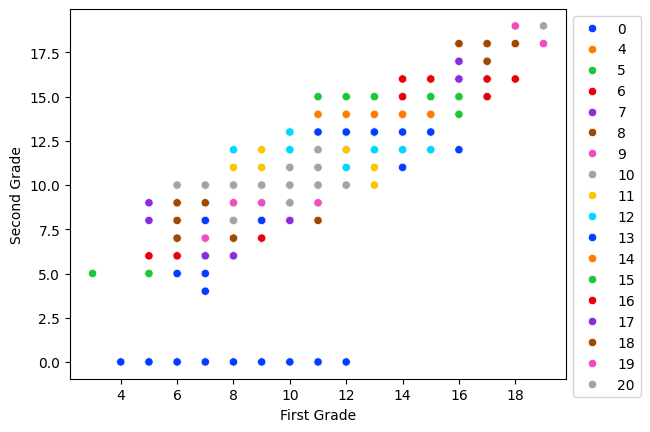

In [76]:
SCATTERPLOT(x_ = 'First Grade', y_ = 'Second Grade', hue_ = 'Final Grade', df = df_maths)

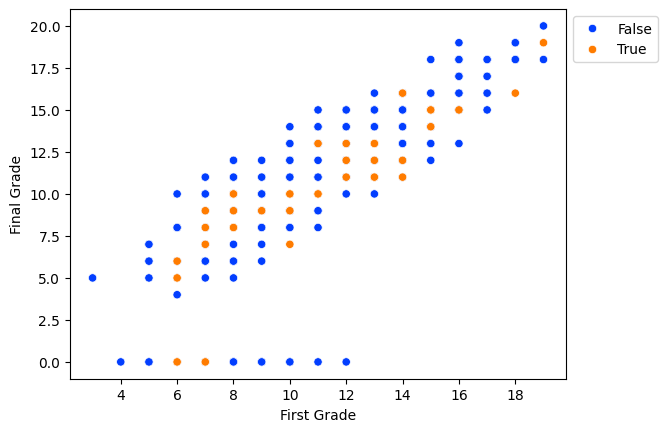

In [77]:
SCATTERPLOT(x_ = 'First Grade', y_ = 'Final Grade', hue_ = 'School MS', df = df_maths)

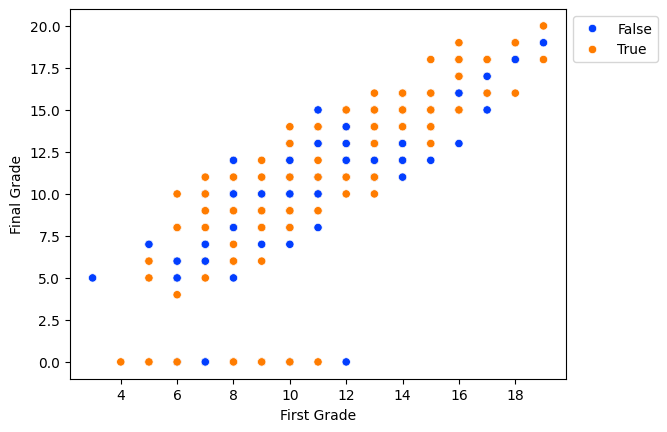

In [78]:
SCATTERPLOT(x_ = 'First Grade', y_ = 'Final Grade', hue_ = 'Urban Address', df = df_maths)

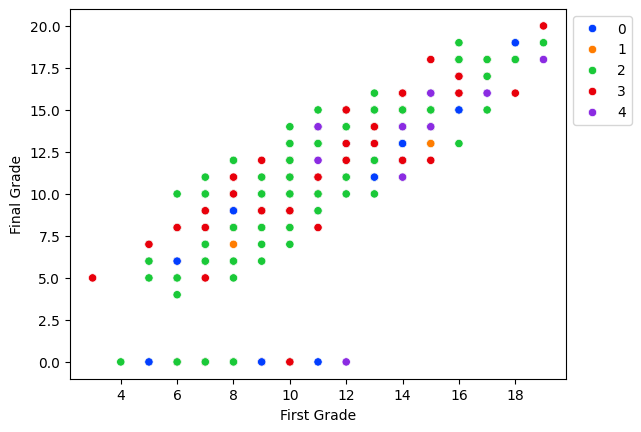

In [79]:
SCATTERPLOT(x_ = 'First Grade', y_ = 'Final Grade', hue_ = "Father's Job", df = df_maths)

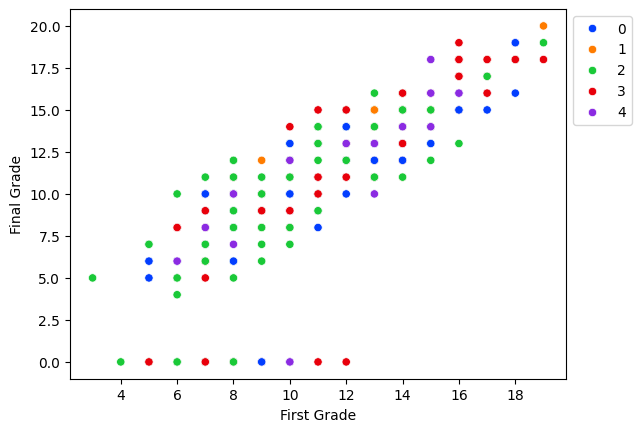

In [80]:
SCATTERPLOT(x_ = 'First Grade', y_ = 'Final Grade', hue_ = "Mother's Job", df = df_maths)

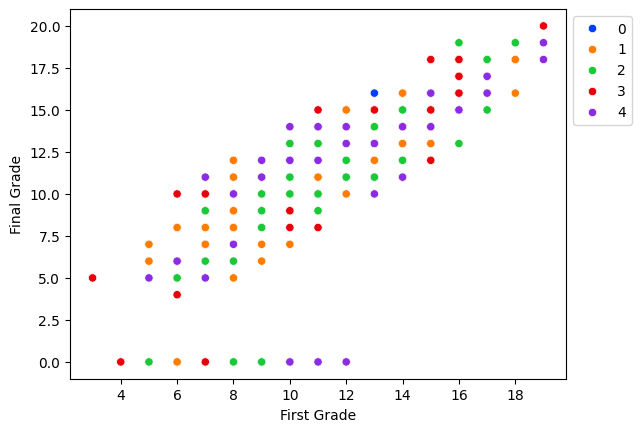

In [81]:
SCATTERPLOT(x_ = 'First Grade', y_ = 'Final Grade', hue_ = "Father's Ed", df = df_maths)

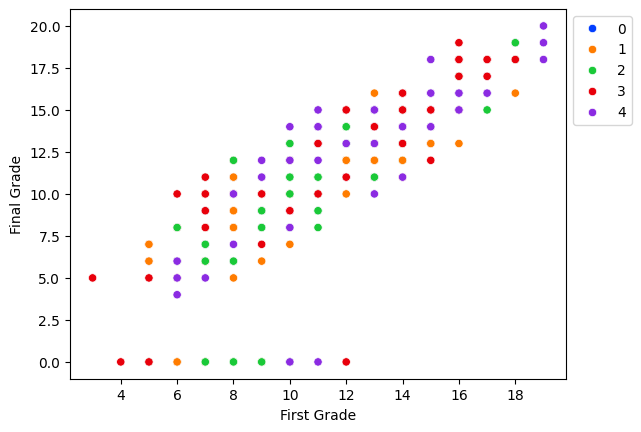

In [82]:
SCATTERPLOT(x_ = 'First Grade', y_ = 'Final Grade', hue_ = "Mother's Ed", df = df_maths)

In [38]:
sns.pairplot(df_maths, 
             hue = 'Final Grade',
             palette = 'bright',
             markers = ['o', 's', 'D'])

<Axes: >

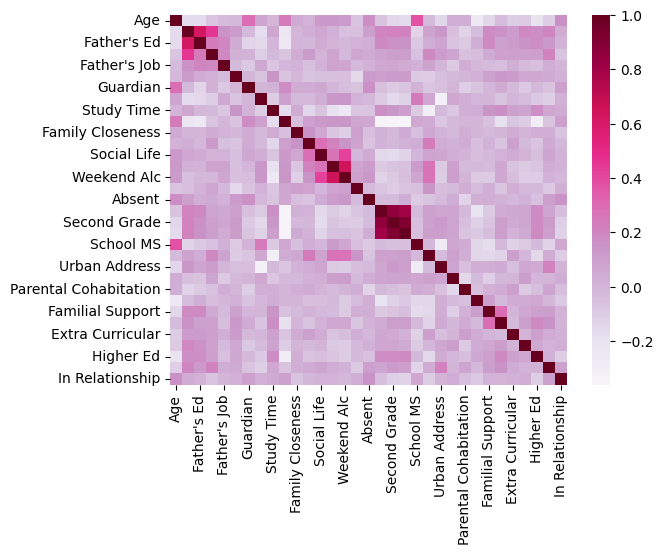

In [39]:
sns.heatmap(df_maths_corrmatrix,
            cmap = 'PuRd')

the same process is repeated for the portuguese test results dataset:

In [83]:
# DIMENSIONALITY REDUCTION OF {df_maths}:

In [84]:
# Scaling the Data...

In [189]:
features_maths = df_maths.drop(columns = ['Final Grade'])
target_maths = df_maths.iloc[:,19:20]

target_maths

Final Grade
0              6
1              6
2             10
3             15
4             10
..           ...
390            9
391           16
392            7
393           10
394            9

[395 rows x 1 columns]

In [266]:
features_train, features_test, target_train, target_test = train_test_split(features_maths, 
                                                                            target_maths, 
                                                                            random_state = 42,  
                                                                            test_size = 0.25) 

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(features_train)
test_features_scaled = scaler.fit_transform(features_test)
train_target_scaled = scaler.fit_transform(target_train)
test_target_scaled = scaler.fit_transform(target_test)

target_test

Final Grade
78            10
371           12
248            5
55            10
390            9
..           ...
367            0
210            8
75            10
104           18
374           19

[99 rows x 1 columns]

In [267]:
# Principal Component Analysis...

In [295]:
pca = PCA()
pca.n_components = 15
train_features_pca = pca.fit_transform(train_features_scaled)
test_features_pca = pca.fit_transform(test_features_scaled)

In [296]:
# ML TRAINING:

In [297]:
# Random Forest...

In [308]:
RandomForest = RandomForestRegressor(n_estimators = 15, random_state = 30)

beginning = time.time()
RandomForest.fit(features_train, target_train)
target_prediction_RF = RandomForest.predict(features_test)
end = time.time() - beginning


print(RandomForest.score(features_test, target_test))
print(end)

0.8681660274409417
0.0639348030090332


In [310]:
RandomForest = RandomForestRegressor(n_estimators = 15, random_state = 30)

beginning = time.time()
RandomForest.fit(train_features_scaled, target_train)
target_prediction_RF = RandomForest.predict(test_features_scaled)
end = time.time() - beginning

print(RandomForest.score(test_features_scaled, target_test))
print(end)

0.8713014517657688
0.0660712718963623


In [311]:
RandomForest = RandomForestRegressor(n_estimators = 15, random_state = 30)

beginning = time.time()
RandomForest.fit(train_features_pca, target_train)
target_prediction_RF = RandomForest.predict(test_features_pca)
end = time.time() - beginning

print(RandomForest.score(pca.transform(test_features_scaled), target_test))
print(end)

-0.5728371878792171
0.0827784538269043


In [301]:
# Support Vector Machine...

In [312]:
SupportVector = SVR(kernel = 'linear')

beginning = time.time()
SupportVector.fit(features_train, target_train)
target_prediction_SV = SupportVector.predict(features_test)
end = time.time() - beginning

print(SupportVector.score(features_test, target_test))
print(end)

0.8014815642988589
0.4759979248046875


In [313]:
SupportVector = SVR(kernel = 'linear')

beginning = time.time()
SupportVector.fit(train_features_scaled, train_target_scaled)
target_prediction_SV = SupportVector.predict(test_features_scaled)
end = time.time() - beginning

print(SupportVector.score(test_features_scaled, test_target_scaled))
print(end)

0.7996082053358188
0.15181303024291992


In [314]:
SupportVector = SVR(kernel = 'linear')

beginning = time.time()
SupportVector.fit(train_features_pca, train_target_scaled)
target_prediction_SV = SupportVector.predict(test_features_pca)
end = time.time() - beginning

print(SupportVector.score(pca.transform(test_features_scaled), test_target_scaled))
print(end)

-1.2545257321618868
0.0447995662689209
